In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import copy
import matplotlib.colors as mcolors
from sklearn.datasets import make_blobs
from sklearn.datasets import make_multilabel_classification

print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Sklearn: ", sk.__version__)

Pandas:  1.3.4
Numpy:  1.20.3
Sklearn:  1.1.1


Help: Shift + Tab 

# In this Notebook we do two things:

## 1. Develop Logistic Regression algorithm from scrach

## 2. Compare and analyse the performance of Logistic Regression with respect to Random Forest, and see how they behave

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification

In [215]:
df['output'].unique()

array([1, 3, 0, 2])

In [219]:
print(df.loc[df['output']==df['output'].unique()[0]].shape)
print(df.loc[df['output']==df['output'].unique()[1]].shape)
print(df.loc[df['output']==df['output'].unique()[2]].shape)
print(df.loc[df['output']==df['output'].unique()[3]].shape)

(400, 4)
(200, 4)
(100, 4)
(50, 4)


In [221]:
df_out0= df.loc[df['output']==df['output'].unique()[0]]
df_out1= df.loc[df['output']==df['output'].unique()[1]]
df_out2= df.loc[df['output']==df['output'].unique()[2]]
df_out3= df.loc[df['output']==df['output'].unique()[3]]

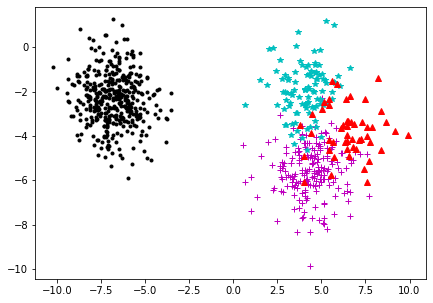

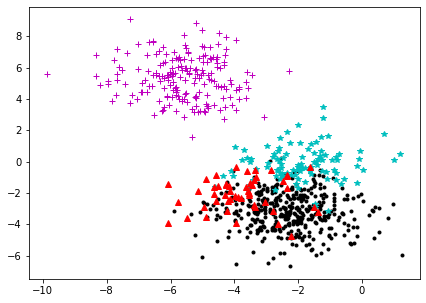

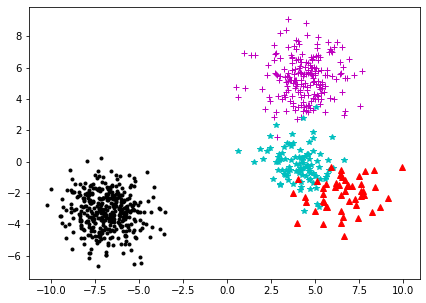

In [261]:
i,j= 1,2
plt.figure(figsize= (7,5))
plt.plot(df_out0.iloc[:,i],df_out0.iloc[:,j], '.k')
plt.plot(df_out1.iloc[:,i],df_out1.iloc[:,j], '+m')
plt.plot(df_out2.iloc[:,i],df_out2.iloc[:,j], '*c')
plt.plot(df_out3.iloc[:,i],df_out3.iloc[:,j], '^r')

l,m= 2,0
plt.figure(figsize= (7,5))
plt.plot(df_out0.iloc[:,l],df_out0.iloc[:,m], '.k')
plt.plot(df_out1.iloc[:,l],df_out1.iloc[:,m], '+m')
plt.plot(df_out2.iloc[:,l],df_out2.iloc[:,m], '*c')
plt.plot(df_out3.iloc[:,l],df_out3.iloc[:,m], '^r')

l,m= 1,0
plt.figure(figsize= (7,5))
plt.plot(df_out0.iloc[:,l],df_out0.iloc[:,m], '.k')
plt.plot(df_out1.iloc[:,l],df_out1.iloc[:,m], '+m')
plt.plot(df_out2.iloc[:,l],df_out2.iloc[:,m], '*c')
plt.plot(df_out3.iloc[:,l],df_out3.iloc[:,m], '^r')

In [277]:
logreg= LogisticRegression()

In [278]:
logreg.fit(df[[0,1,2]], df['output'])

LogisticRegression()

In [285]:
logreg.coef_[2]

array([-1.32950382,  1.77703284, -0.37544204])

In [273]:
df[[0,1,2]]

,0,1,2
0,-3.673464,-6.488985,-4.578422
1,4.131725,3.265619,-5.217998
2,0.983898,3.619217,-2.962597
3,-4.876652,-8.143301,-2.335630
4,-2.318553,-6.597223,-0.277172
...,...,...,...
745,0.046019,5.081919,-2.588205
746,4.831082,3.901738,-6.568066
747,-3.949840,-7.498966,-0.558189
748,1.498009,4.909948,-2.576834


# Creating simulated Multi-Class dataset

In [33]:
from sklearn.datasets import make_classification

In [48]:
data1= make_classification()
df1= pd.DataFrame(data1[0])
df1['output']= data1[1]

In [301]:
data1[0][:,1]

array([ 0.51527595, -1.506701  , -1.33805145,  0.29964674,  0.3399453 ,
       -0.73332391, -0.28089934,  0.89691797, -1.07965631,  0.73214805,
       -0.27226701,  1.04023126, -0.61510376,  1.0704281 , -0.24128759,
        0.73113046, -0.75627922, -0.49483138, -2.21370985, -1.82452995,
       -0.99075108,  0.15576885,  0.54740839, -0.55874085,  0.0924737 ,
       -0.53034998,  0.37451304,  0.21478086,  0.36038802, -0.11222745,
       -0.9354602 ,  0.69649492,  1.45952523,  0.22846949,  0.46379545,
        0.22909434, -0.77990486,  0.21357136,  0.74784172, -0.02439336,
        0.21297464,  0.07356959,  0.38437196, -0.89596654,  0.14864134,
        0.09936613, -0.63311172,  0.61535645, -0.58502548, -0.29290593,
       -1.72322416,  1.18057443,  0.72569121,  0.84762428,  0.86663212,
       -0.15584085,  0.68865168,  0.73125269, -0.32924397,  0.81184676,
       -1.51123795,  0.13101589, -0.95041927,  0.90044755,  1.72684181,
        0.68736918,  1.34310348, -1.39816671, -0.13303739,  1.20

In [49]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,output
0,0.530142,0.515276,0.743655,1.051061,-0.021724,-0.414815,-0.561612,-1.650512,0.026276,-1.173522,...,0.110039,1.610369,1.092358,1.095056,-0.562145,-0.717968,-0.265798,1.478708,0.234087,1
1,0.040286,-1.506701,-0.090976,0.862248,0.606042,-0.697980,-1.486061,1.146304,-0.700252,-0.489607,...,0.402629,-1.732060,0.788346,0.882200,0.529003,-0.495056,-0.363729,0.440500,0.113674,1
2,-1.253813,-1.338051,-1.710906,-1.046193,-0.611568,-0.918855,0.769843,-0.553421,0.321482,0.408243,...,0.376555,-0.700375,-1.884671,0.221542,0.662869,1.409588,-0.226063,-0.417483,-0.812729,0
3,-0.063050,0.299647,0.373372,0.887088,1.278017,-0.755877,-0.572437,0.539135,1.227238,0.345394,...,0.607214,-0.317004,-1.709514,0.402057,0.510263,1.687473,-0.453187,-1.911422,-1.715624,0
4,1.283772,0.339945,0.925604,-1.799733,-0.010645,0.825238,-0.842598,1.139786,0.271681,2.894066,...,0.297528,1.673245,-1.279700,-1.215994,-0.874846,0.714515,1.770675,1.225251,0.028673,1


In [66]:
df1_out0= df1.loc[df1['output']==df1['output'].unique()[1]]
df1_out1= df1.loc[df1['output']==df1['output'].unique()[0]]
df1_out1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,output
0,0.530142,0.515276,0.743655,1.051061,-0.021724,-0.414815,-0.561612,-1.650512,0.026276,-1.173522,...,0.110039,1.610369,1.092358,1.095056,-0.562145,-0.717968,-0.265798,1.478708,0.234087,1
1,0.040286,-1.506701,-0.090976,0.862248,0.606042,-0.697980,-1.486061,1.146304,-0.700252,-0.489607,...,0.402629,-1.732060,0.788346,0.882200,0.529003,-0.495056,-0.363729,0.440500,0.113674,1
4,1.283772,0.339945,0.925604,-1.799733,-0.010645,0.825238,-0.842598,1.139786,0.271681,2.894066,...,0.297528,1.673245,-1.279700,-1.215994,-0.874846,0.714515,1.770675,1.225251,0.028673,1
5,-1.116219,-0.733324,1.227343,1.390664,2.095043,-0.784524,1.173324,0.069280,0.894084,1.947280,...,1.983674,-0.003129,1.438885,1.137656,-1.170012,-0.944352,0.455874,0.185271,0.305054,1
10,0.336746,-0.272267,-0.516246,-1.200940,-0.242810,0.471157,1.151060,0.304276,1.557962,1.041342,...,-0.755535,-0.932341,0.421960,-0.447612,-0.606776,-0.635207,0.567252,-0.483235,0.946763,1


Text(0, 0.5, 'index 2')

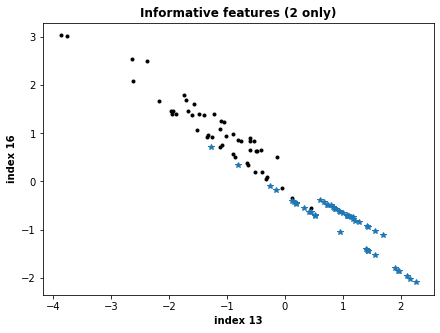

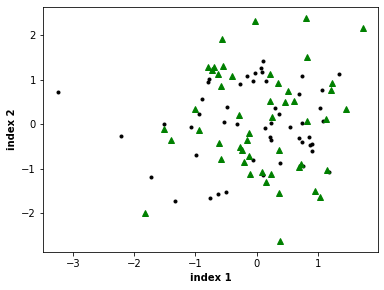

In [291]:
i,j= 13,16
plt.figure(figsize=(7,5))
plt.plot(df1_out0[i], df1_out0[j], '.k')
plt.plot(df1_out1[i], df1_out1[j], '*')
plt.xlabel(f"index {i}", weight= 'bold')
plt.ylabel(f"index {j}", weight= 'bold')
plt.title("Informative features (2 only)", weight= 'bold')

k,l= 1,2  #Change these values have fun!
plt.figure(figsize=(6,4.5))
plt.plot(df1_out0[k], df1_out0[l], '.k')
plt.plot(df1_out1[k], df1_out1[l], '^g')
plt.xlabel(f"index {k}", weight= 'bold')
plt.ylabel(f"index {l}", weight= 'bold')

### index = 13 and 16 are strong predictors of the output (exhaustively)

### There is a strong -ve correlation between them

(array([ 1.,  1.,  2.,  4.,  4., 11.,  6.,  9.,  7.,  5.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.,  0.,  3.,  2.,  5., 11.,  4.,  6.,  3.,  6.,
         3.,  1.,  2.,  1.]),
 array([-1.7997333 , -1.67433285, -1.54893239, -1.42353194, -1.29813148,
        -1.17273103, -1.04733057, -0.92193012, -0.79652966, -0.67112921,
        -0.54572875, -0.4203283 , -0.29492784, -0.16952739, -0.04412693,
         0.08127352,  0.20667398,  0.33207443,  0.45747489,  0.58287534,
         0.7082758 ,  0.83367625,  0.9590767 ,  1.08447716,  1.20987761,
         1.33527807,  1.46067852,  1.58607898,  1.71147943,  1.83687989,
         1.96228034]),
 <BarContainer object of 30 artists>)

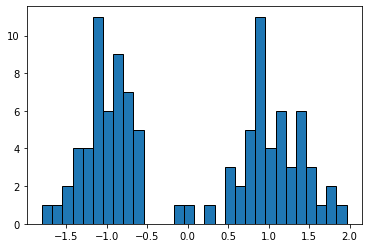

In [445]:
plt.hist(df1[3], bins=30, edgecolor= 'k')

###        ^^^ Weird Distribution  ^^^

# Time for some Logistic Regresssion B)

In [ ]:
parameters vs gradient descent

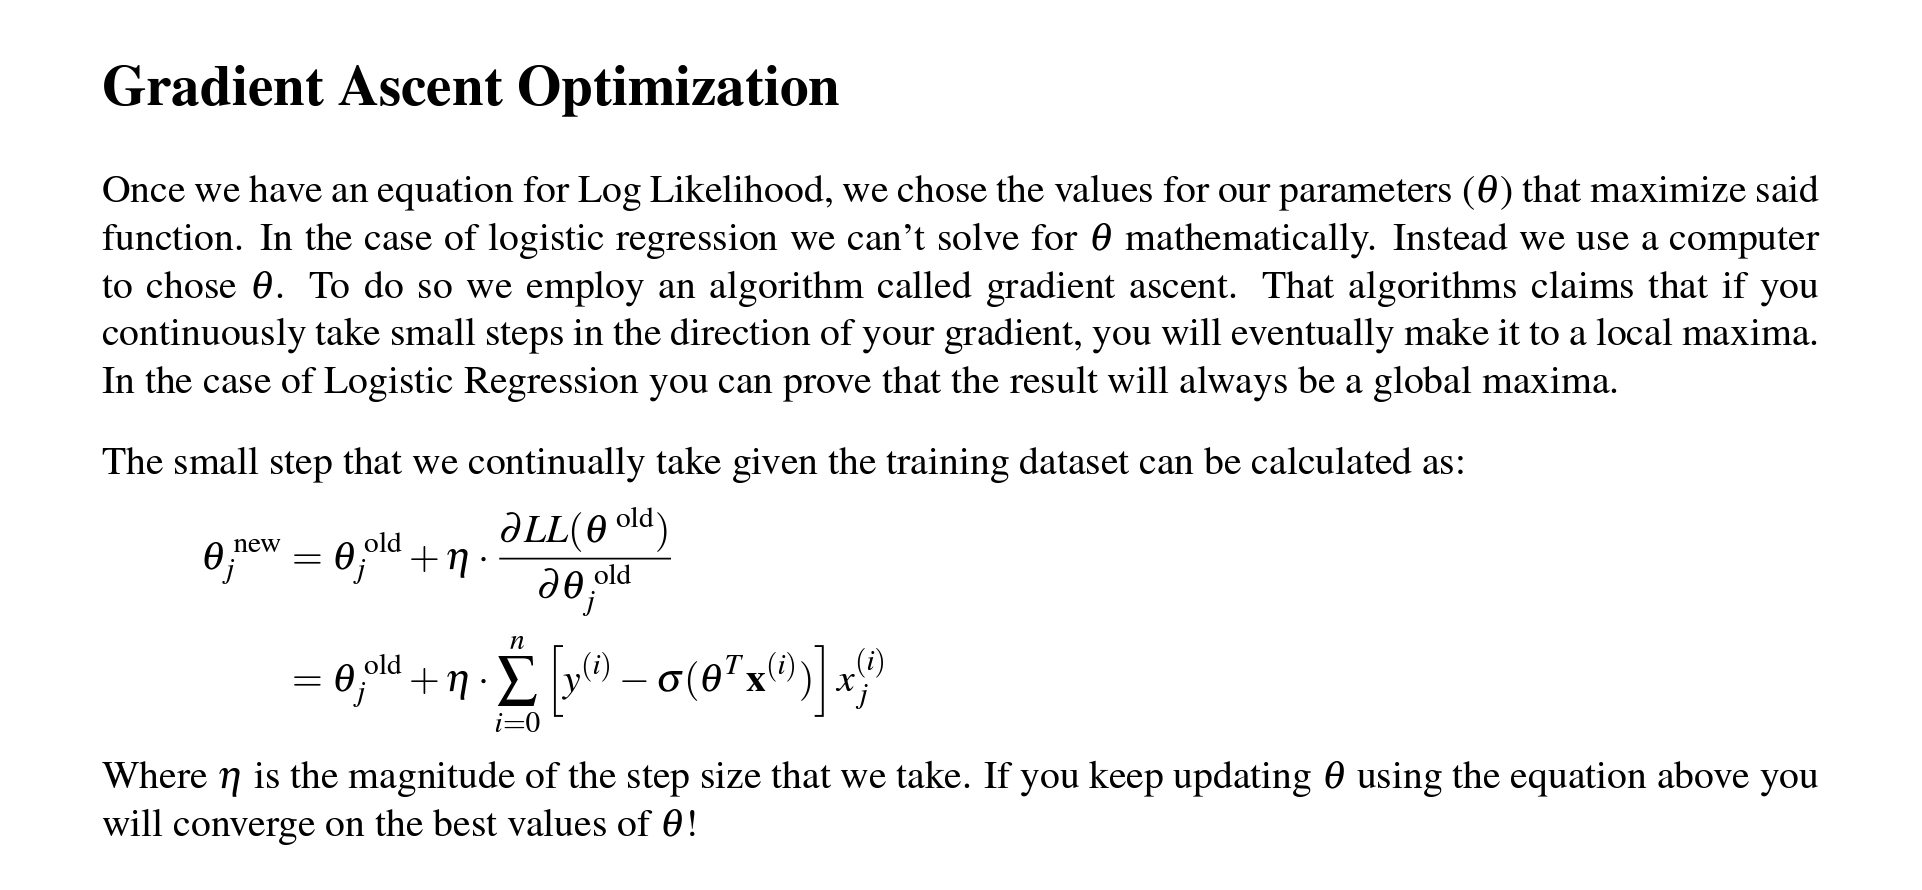 

# Functions for doing Logistic Regression
Making Logistic Regression algorithm from scratch. 
Link- https://en.wikipedia.org/wiki/Logistic_regression

In [438]:
def sigma(x):
    return 1/(1+np.exp(-x))

def logistic_reg_pred(X, beta, beta_0):
    prob= np.exp(beta_0+ np.dot(X, beta))/(1+np.exp(beta_0+ np.dot(X, beta)))
    return prob

def logistic_reg_cost(Y, X, beta, beta_0):
    Y_pred = logistic_reg_pred(X, beta, beta_0)
    log_Ypred = np.log(Y_pred)
    log_1_Ypred = np.log(1-Y_pred)
    term1= Y*log_Ypred
    term2= (1-Y)*log_1_Ypred
    return np.sum(term1+term2)

def gradient_descent(Y, X, beta, beta_0, iterations= 20000, alpha= 0.1):
    n= len(Y)
    m= len(beta)
    cost_history= np.zeros(iterations)
    beta_temp= copy.deepcopy(beta)
    beta_0temp= beta_0
    bta= np.zeros(iterations)
    
    #now update \beta in terms of the derivative of cost function
    for k in range(iterations):
        for j in range(m):
            beta_temp[j]= beta[j] + alpha*np.sum((Y-sigma(beta_0+np.dot(X,beta)))*X[:,j])
        beta_0temp= beta_0 + alpha*np.sum(Y-sigma(beta_0+np.dot(X,beta)))
        beta= copy.deepcopy(beta_temp)
        beta_0= beta_0temp
        #print(beta[1], beta_0)
        cost_history[k]= logistic_reg_cost(Y, X, beta, beta_0)
        
        bta[k]= beta[2]
    plt.plot(np.arange(0,iterations), bta)
        
    return beta, beta_0, cost_history

def logistic_reg_fit(X, Y, threshold= 0.5):
    m= X.shape[1]
    n= X.shape[0]
    iterations= 10000
    
    #initial conditions
    beta= np.zeros(m)+0.1
    beta_0= 0.1
    beta, beta_0, cost_history= gradient_descent(Y, X, beta, beta_0)
    y_prob = logistic_reg_pred(X, beta, beta_0)
    y_pred = np.heaviside(logistic_reg_pred(X, beta, beta_0) - threshold, 0)
    return y_prob, y_pred 

/var/folders/l0/8z1l6dz91hbbww5v8c6mnhfm0000gn/T/ipykernel_39970/1043109665.py:11: RuntimeWarning: divide by zero encountered in log
  log_1_Ypred = np.log(1-Y_pred)
/var/folders/l0/8z1l6dz91hbbww5v8c6mnhfm0000gn/T/ipykernel_39970/1043109665.py:13: RuntimeWarning: invalid value encountered in multiply
  term2= (1-Y)*log_1_Ypred


Y-Probability:
 [1.00000000e+00 1.00000000e+00 1.69344189e-49 1.82516799e-31
 9.97189048e-01 1.00000000e+00 6.31934274e-24 9.03198128e-55
 1.35768549e-07 2.06607887e-55 1.00000000e+00 3.35820787e-03
 1.00000000e+00 2.55729560e-30 1.00000000e+00 1.48374425e-26
 6.05080079e-32 7.11975753e-26 2.62981386e-04 9.97458755e-01
 5.21241213e-03 1.00000000e+00 2.83204586e-20 1.00000000e+00
 5.37535627e-39 1.43408453e-35 2.37875046e-36 1.00000000e+00
 9.99389038e-01 1.00000000e+00 9.99500135e-01 1.28252051e-41
 1.00000000e+00 1.17976401e-36 1.00000000e+00 1.00000000e+00
 9.51439164e-19 9.99999997e-01 1.29398352e-63 1.91825153e-35
 3.47940169e-23 4.03413601e-12 9.98755069e-01 4.00747306e-09
 1.14498723e-28 2.98534351e-03 1.57592213e-16 1.00000000e+00
 1.00000000e+00 9.99999943e-01 1.18005080e-71 7.18205372e-35
 1.00000000e+00 7.75269642e-35 1.14484250e-26 3.32873518e-18
 1.19871418e-10 4.13881538e-21 8.40302675e-05 1.00000000e+00
 4.02548825e-04 3.84177027e-20 1.03355964e-04 2.15196522e-28
 1.00000

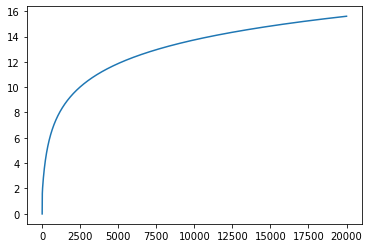

In [442]:
y_prob, y_pred= logistic_reg_fit(data1[0], data1[1])
print("Y-Probability:\n",y_prob)
print("\n\nY-Prediction:\n",y_pred)
accuracy= data1[1]-y_pred
print("\n\n Incorrect Predictions:\n",accuracy)

**No incorrect predictions at all. The algorithm works well. Yaay!**

# Some observations:
- While calculation the cost function if the model is extremely sure the output is 1/0 and gives 1 as probability of expected output. The cost function then blows up to infinity as its denominator becomes 0, which can be seen from the equation of cost function given. This has happened in our case and is the reason why we are getting NaN output.
- Since the function is itself very simple (only linear) regularization is not requred unless we do feature engineering and construct more complex features.

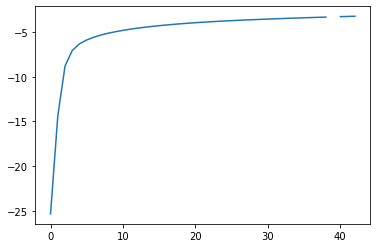

In [417]:
len(cost_history)
plt.plot(np.arange(0,len(cost_history)), cost_history)

## Plot of exp(B*X)/(1+exp(B*X))

Text(0.5, 0.92, 'a= 4 ; b= 4')

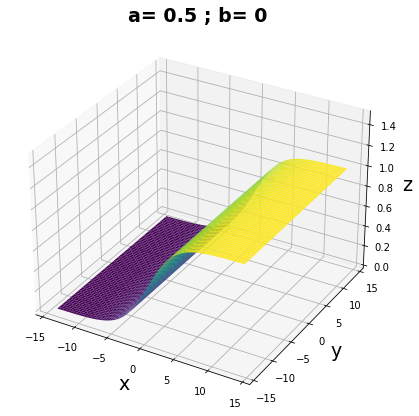

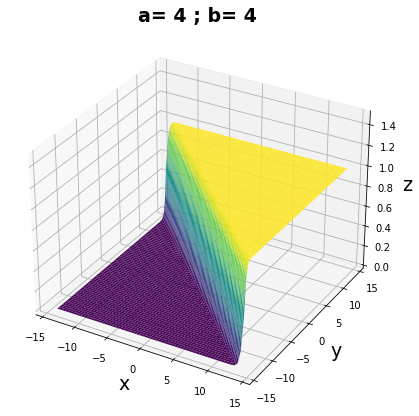

In [485]:
def f(x, y, a, b):
    return  np.exp(a*x+b*y)/(1+np.exp(a*x+b*y))

x = np.linspace(-14, 14, 70)
y = np.linspace(-14, 14, 70)

X, Y = np.meshgrid(x, y)

#Play with a and b
Z = f(X, Y, 0.5, 0)

fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_zlim(0,1.5)
ax.set_xlabel('x', size=19)
ax.set_ylabel('y', size=19)
ax.set_zlabel('z', size=19)
ax.set_title("a= 0.5 ; b= 0", weight= 'bold', size=19)

Z = f(X, Y, 4, 4)

fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.set_zlim(0,1.5)
ax.set_xlabel('x', size=19)
ax.set_ylabel('y', size=19)
ax.set_zlabel('z', size=19)
ax.set_title("a= 4 ; b= 4", weight= 'bold', size=19)


## Some observations 
- The maximum change in the function is in the direction of \beta. The contour of equal probiblity are the hypersurfaces which are normal to \beta.
- If we increase the magnintude of \beta the function squishes in the direction of \beta.
- The equal peobability hypersurfaces are linear. Thus the decision boundary formed would be linear only.

# Comparing performances of Logistic Regression vs Random Forests

In [479]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

(array([[ 1.,  0.,  0.,  1.,  4.,  4.,  8.,  7., 14., 19., 14., 13., 23.,
         12.,  9., 11., 12., 12., 12.,  8.,  8.,  3.,  1.,  1.,  1.,  1.,
          1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  2.,  4.,  6., 17., 14., 12., 12., 19., 17.,
         15.,  6., 10., 11., 15., 12., 11.,  6.,  3.,  3.,  0.,  0.,  0.,
          1.,  0.,  0.,  1.]]),
 array([-3.60487462, -3.32653249, -3.04819036, -2.76984824, -2.49150611,
        -2.21316399, -1.93482186, -1.65647974, -1.37813761, -1.09979549,
        -0.82145336, -0.54311123, -0.26476911,  0.01357302,  0.29191514,
         0.57025727,  0.84859939,  1.12694152,  1.40528365,  1.68362577,
         1.9619679 ,  2.24031002,  2.51865215,  2.79699427,  3.0753364 ,
         3.35367853,  3.63202065,  3.91036278,  4.1887049 ,  4.46704703,
         4.74538915]),
 <a list of 2 BarContainer objects>)

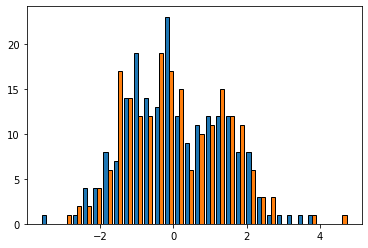

In [450]:
data2 = make_classification(n_samples= 200,
                           n_features= 2,
                           n_informative= 2,
                           n_redundant= 0)
plt.hist(data2[0], bins=30, edgecolor= 'k')

In [461]:
X_train2= data2[0][0:100]
Y_train2= data2[1][0:100]
X_test2= data2[0][100:]
Y_test2= data2[1][100:]

In [462]:
LR1= LogisticRegression(penalty='l2',
                       dual=False,
                       tol=0.0001,
                       C=1.0,
                       fit_intercept=True,
                       intercept_scaling=1,
                       max_iter=100,)

In [465]:
LR1.fit(X_train2, Y_train2)
LR1_coeffs= LR1.coef_

In [466]:
LR1_coeffs

array([[ 1.97162709, -0.48929361]])

In [468]:
LR1.intercept_
LR1.classes_

array([0, 1])

In [474]:
sum(abs(LR1.predict(X_test2)-Y_test2))/100

0.14

In [475]:
LR1.predict(X_test2)-Y_test2

array([ 0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0])

In [478]:
print(classification_report(LR1.predict(X_test2), Y_test2))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        49
           1       0.85      0.88      0.87        51

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [482]:
accuracy_score(LR1.predict(X_test2), Y_test2)

0.86

In [ ]:
What is my name what am i doing with my life?? Who am i??

In [524]:
RF1= RandomForestClassifier(n_estimators=100,
                            criterion= 'gini',
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 2,
                            max_leaf_nodes= None,
                            ccp_alpha= 0)

In [525]:
RF1.fit(X_train2, Y_train2)
RF1.predict(X_test2)-Y_test2

array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0])

In [526]:
print(classification_report(RF1.predict(X_test2),Y_test2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.94      0.86      0.90        58

    accuracy                           0.89       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.89      0.89       100



### Default settings for both model shows Random Forest performs better, with accuracy: LR ~ 86%; RF ~ 89%

In [665]:
RF2= RandomForestClassifier(n_estimators=30,
                            criterion= 'gini',
                            max_features= 'sqrt',
                            min_samples_leaf= 2,
                            min_samples_split= 2,
                            max_leaf_nodes= None,
                            ccp_alpha= 0)
RF2.fit(X_train2, Y_train2)
print(classification_report(RF2.predict(X_test2),Y_test2))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        39
           1       0.98      0.85      0.91        61

    accuracy                           0.90       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100



In [666]:
print("hello there")

hello there


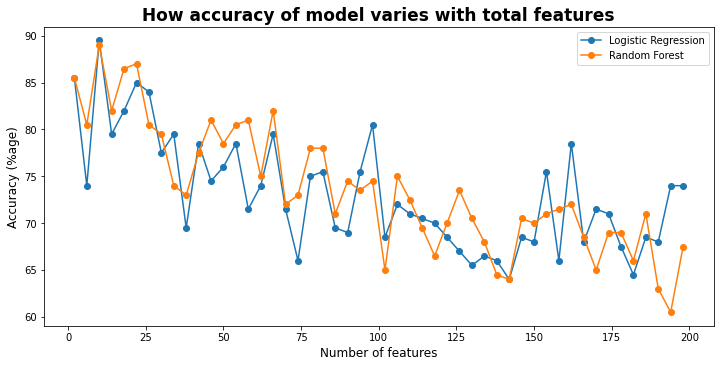

In [714]:
smapl= 400
n_bootstrap= 100
n=50
LR_accuracy=np.zeros(n)
RF_accuracy=np.zeros(n)

for i in range(n):
    data3 = make_classification(n_samples= smapl,
                               n_features= 4*i+2,
                               n_informative= 4*i+2,
                               n_redundant= 0)
    
    #half of data into training half into test
    X_train3= data3[0][0:int(smapl/2)]
    Y_train3= data3[1][0:int(smapl/2)]
    X_test3= data3[0][int(smapl/2):]
    Y_test3= data3[1][int(smapl/2):]
    #print(X_train3.shape)
    
    LR3= LogisticRegression(penalty='l2',
                       dual=False,
                       tol=0.0001,
                       C=1.0,
                       fit_intercept=True,
                       intercept_scaling=1,
                       max_iter=300,)
    RF3= RandomForestClassifier(n_estimators=n_bootstrap,
                        criterion= 'gini',
                        max_features= 'sqrt',
                        min_samples_leaf= 1,
                        min_samples_split= 2,
                        max_leaf_nodes= None,
                        ccp_alpha= 0)
    
    LR3.fit(X_train3, Y_train3)
    RF3.fit(X_train3, Y_train3)
    LR_accuracy[i]= accuracy_score(LR3.predict(X_test3), Y_test3)
    RF_accuracy[i]= accuracy_score(RF3.predict(X_test3), Y_test3)
    
plt.figure(figsize= (12,5.5))
plt.plot(np.arange(0,4*n,4)+2, LR_accuracy*100, 'o-', label= 'Logistic Regression')
plt.plot(np.arange(0,4*n,4)+2, RF_accuracy*100, 'o-', label= 'Random Forest')
plt.xlabel('Number of features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title('How accuracy of model varies with total features', size= 17, weight= 'bold')
plt.legend()

In [770]:
def rf_vs_lr(n=20, smapl= 400, n_bootstrap= 100, steps_features= 2, steps_informative= 2, steps_redundant= 0):
    
    """
    n                      ---   number of iterations loop will take
    steps_features         ---   steps of feature increase each iteration
    n * steps_features     ---   total number of features
    n * steps_informative  ---   total number of informative features
    n * steps_redundant    ---   ttoal numbeer of redundant features (that are highly correlated with other features)
    """
    
    
    LR_accuracy=np.zeros(n)
    RF_accuracy=np.zeros(n)
    LR_accuracy_train=np.zeros(n)
    RF_accuracy_train=np.zeros(n)
    
    for i in range(n):
        data3 = make_classification(n_samples= smapl,
                                   n_features= steps_features*i+2,
                                   n_informative= steps_informative*i+2,
                                   n_redundant= 0)

        #half of data into training half into test
        X_train3= data3[0][0:int(smapl/2)]
        Y_train3= data3[1][0:int(smapl/2)]
        X_test3= data3[0][int(smapl/2):]
        Y_test3= data3[1][int(smapl/2):]
        #print(X_train3.shape)

        LR3= LogisticRegression(penalty='l2',
                           dual=False,
                           tol=0.0001,
                           C=1.0,
                           fit_intercept=True,
                           intercept_scaling=1,
                           max_iter=300,)
        RF3= RandomForestClassifier(n_estimators=n_bootstrap,
                            criterion= 'gini',
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 2,
                            max_leaf_nodes= None,
                            ccp_alpha= 0)

        LR3.fit(X_train3, Y_train3)
        RF3.fit(X_train3, Y_train3)
        LR_accuracy[i]= accuracy_score(LR3.predict(X_test3), Y_test3)
        LR_accuracy_train[i]= accuracy_score(LR3.predict(X_train3), Y_train3)
        RF_accuracy[i]= accuracy_score(RF3.predict(X_test3), Y_test3)
        RF_accuracy_train[i]= accuracy_score(RF3.predict(X_train3), Y_train3)
    return LR_accuracy, RF_accuracy, LR_accuracy_train, RF_accuracy_train



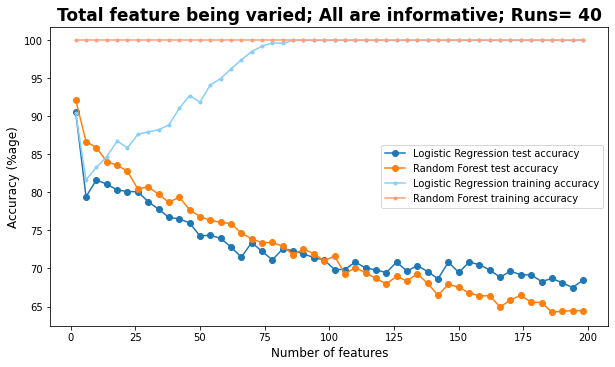

In [787]:
n_loop = 40
iteratn= 50
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr(steps_informative= 4, steps_features= 4, n= iteratn)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0,4*iteratn,4)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy')
plt.plot(np.arange(0,4*iteratn,4)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy')
plt.plot(np.arange(0,4*iteratn,4)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='lightskyblue')
plt.plot(np.arange(0,4*iteratn,4)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightsalmon')
plt.xlabel('Number of features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Total feature being varied; All are informative; Runs= {n_loop}', size= 17, weight= 'bold')
plt.legend()

In [778]:
def rf_vs_lr_1(n=20, smapl= 400, n_bootstrap= 100, n_featuress= 100, steps_informative= 2, steps_redundant= 0):
    
    """
    n                      ---   number of iterations loop will take
    steps_features         ---   steps of feature increase each iteration
    n * steps_features     ---   total number of features
    n * steps_informative  ---   total number of informative features
    n * steps_redundant    ---   ttoal numbeer of redundant features (that are highly correlated with other features)
    """
    
    
    LR_accuracy=np.zeros(n)
    RF_accuracy=np.zeros(n)
    LR_accuracy_train=np.zeros(n)
    RF_accuracy_train=np.zeros(n)
    
    for i in range(n):
        data3 = make_classification(n_samples= smapl,
                                   n_features= n_featuress,
                                   n_informative= steps_informative*i+2,
                                   n_redundant= 0)

        #half of data into training half into test
        X_train3= data3[0][0:int(smapl/2)]
        Y_train3= data3[1][0:int(smapl/2)]
        X_test3= data3[0][int(smapl/2):]
        Y_test3= data3[1][int(smapl/2):]
        #print(X_train3.shape)

        LR3= LogisticRegression(penalty='l2',
                           dual=False,
                           tol=0.0001,
                           C=1.0,
                           fit_intercept=True,
                           intercept_scaling=1,
                           max_iter=300,)
        RF3= RandomForestClassifier(n_estimators=n_bootstrap,
                            criterion= 'gini',
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 2,
                            max_leaf_nodes= None,
                            ccp_alpha= 0)

        LR3.fit(X_train3, Y_train3)
        RF3.fit(X_train3, Y_train3)
        LR_accuracy[i]= accuracy_score(LR3.predict(X_test3), Y_test3)
        LR_accuracy_train[i]= accuracy_score(LR3.predict(X_train3), Y_train3)
        RF_accuracy[i]= accuracy_score(RF3.predict(X_test3), Y_test3)
        RF_accuracy_train[i]= accuracy_score(RF3.predict(X_train3), Y_train3)
    return LR_accuracy, RF_accuracy, LR_accuracy_train, RF_accuracy_train

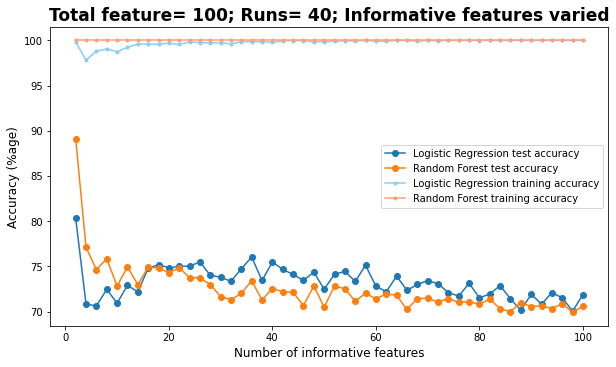

In [788]:
n_loop = 40
iteratn= 50
info_steps=2
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr_1(n_featuress= 100, steps_informative= info_steps, n= iteratn, smapl= 400)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='lightskyblue')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightsalmon')
plt.xlabel('Number of informative features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Total feature= {100}; Runs= {n_loop}; Informative features varied', size= 17, weight= 'bold')
plt.legend()

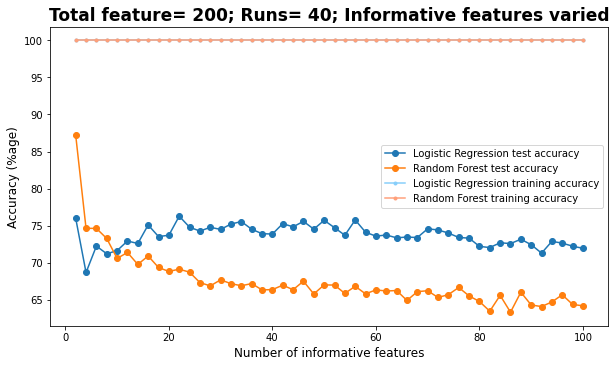

In [789]:
n_loop = 40
iteratn= 50
info_steps=2
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr_1(n_featuress= 200, steps_informative= info_steps, n= iteratn, smapl= 400)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='lightskyblue')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightsalmon')
plt.xlabel('Number of informative features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Total feature= {200}; Runs= {n_loop}; Informative features varied', size= 17, weight= 'bold')
plt.legend()

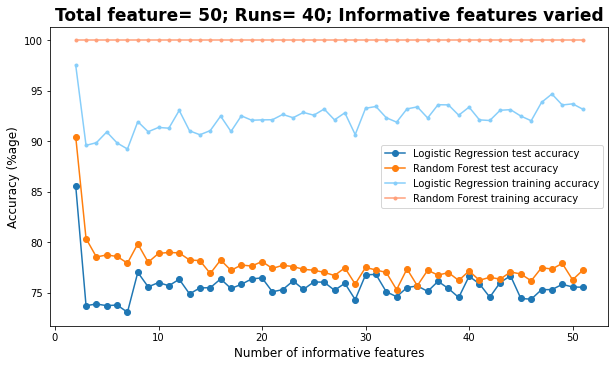

In [792]:
n_loop = 40
iteratn= 50
info_steps=1
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr_1(n_featuress= 53, steps_informative= info_steps, n= iteratn, smapl= 400)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='lightskyblue')
plt.plot(np.arange(0,info_steps*iteratn,info_steps)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightsalmon')
plt.xlabel('Number of informative features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Total feature= {50}; Runs= {n_loop}; Informative features varied', size= 17, weight= 'bold')
plt.legend()

In [793]:
def rf_vs_lr_3(n=20, smapl= 400, n_bootstrap= 100, steps_features= 2, n_informativee= 5, steps_redundant= 0):
    
    
    LR_accuracy=np.zeros(n)
    RF_accuracy=np.zeros(n)
    LR_accuracy_train=np.zeros(n)
    RF_accuracy_train=np.zeros(n)
    
    for i in range(n):
        data3 = make_classification(n_samples= smapl,
                                   n_features= steps_features* i + n_informativee,
                                   n_informative= n_informativee,
                                   n_redundant= 0)

        #half of data into training half into test
        X_train3= data3[0][0:int(smapl/2)]
        Y_train3= data3[1][0:int(smapl/2)]
        X_test3= data3[0][int(smapl/2):]
        Y_test3= data3[1][int(smapl/2):]
        #print(X_train3.shape)

        LR3= LogisticRegression(penalty='l2',
                           dual=False,
                           tol=0.0001,
                           C=1.0,
                           fit_intercept=True,
                           intercept_scaling=1,
                           max_iter=300,)
        RF3= RandomForestClassifier(n_estimators=n_bootstrap,
                            criterion= 'gini',
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 2,
                            max_leaf_nodes= None,
                            ccp_alpha= 0)

        LR3.fit(X_train3, Y_train3)
        RF3.fit(X_train3, Y_train3)
        LR_accuracy[i]= accuracy_score(LR3.predict(X_test3), Y_test3)
        LR_accuracy_train[i]= accuracy_score(LR3.predict(X_train3), Y_train3)
        RF_accuracy[i]= accuracy_score(RF3.predict(X_test3), Y_test3)
        RF_accuracy_train[i]= accuracy_score(RF3.predict(X_train3), Y_train3)
    return LR_accuracy, RF_accuracy, LR_accuracy_train, RF_accuracy_train

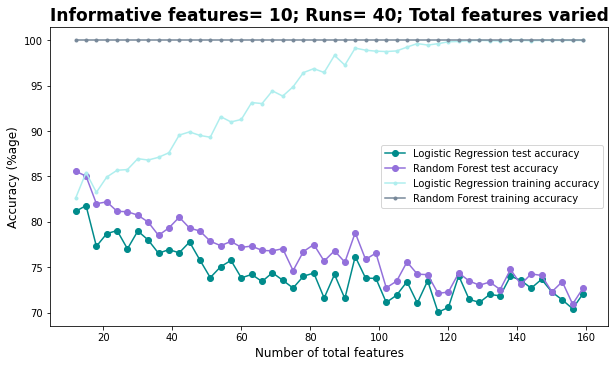

In [825]:
n_loop = 40
iteratn= 50
featr_steps= 3
informtiv_featr= 10
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr_3(steps_features= featr_steps, n_informativee= informtiv_featr, n= iteratn, smapl= 400)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy', color= 'darkcyan')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy', color= 'mediumpurple')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='paleturquoise')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightslategrey')
plt.xlabel('Number of total features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Informative features= {informtiv_featr}; Runs= {n_loop}; Total features varied', size= 17, weight= 'bold')
plt.legend()

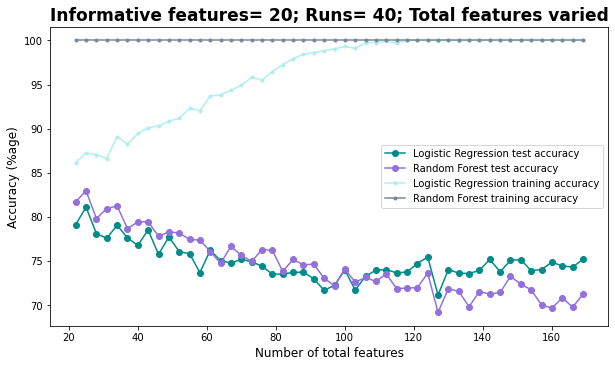

In [826]:
n_loop = 40
iteratn= 50
featr_steps= 3
informtiv_featr= 20
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr_3(steps_features= featr_steps, n_informativee= informtiv_featr, n= iteratn, smapl= 400)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy', color= 'darkcyan')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy', color= 'mediumpurple')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='paleturquoise')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightslategrey')
plt.xlabel('Number of total features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Informative features= {informtiv_featr}; Runs= {n_loop}; Total features varied', size= 17, weight= 'bold')
plt.legend()

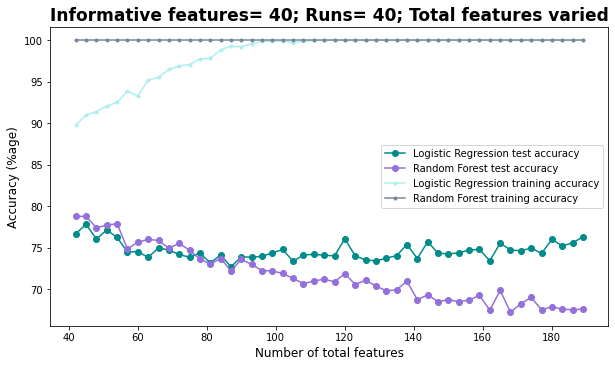

In [827]:
n_loop = 40
iteratn= 50
featr_steps= 3
informtiv_featr= 40
acc_rf, acc_lr = 0,0
train_acc_rf, train_acc_lr = 0,0
for i in range(n_loop):
    lr, rf, train_lr, train_rf = rf_vs_lr_3(steps_features= featr_steps, n_informativee= informtiv_featr, n= iteratn, smapl= 400)
    acc_rf= acc_rf + rf
    acc_lr= acc_lr + lr
    train_acc_lr= train_acc_lr + train_lr
    train_acc_rf= train_acc_rf + train_rf
plt.figure(figsize= (10,5.5))
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, acc_lr*100/n_loop, 'o-', label= 'Logistic Regression test accuracy', color= 'darkcyan')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, acc_rf*100/n_loop, 'o-', label= 'Random Forest test accuracy', color= 'mediumpurple')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, train_acc_lr*100/n_loop, '.-', label= 'Logistic Regression training accuracy', color='paleturquoise')
plt.plot(np.arange(0+informtiv_featr,featr_steps*iteratn+informtiv_featr,featr_steps)+2, train_acc_rf*100/n_loop, '.-', label= 'Random Forest training accuracy', color='lightslategrey')
plt.xlabel('Number of total features', size= 12)
plt.ylabel('Accuracy (%age)', size= 12)
plt.title(f'Informative features= {informtiv_featr}; Runs= {n_loop}; Total features varied', size= 17, weight= 'bold')
plt.legend()

In [ ]:
def rf_vs_lr(n=20, smapl= 400, n_bootstrap= 100, steps_features= 2, steps_informative= 2, steps_redundant= 0):
    
    """
    n                      ---   number of iterations loop will take
    steps_features         ---   steps of feature increase each iteration
    n * steps_features     ---   total number of features
    n * steps_informative  ---   total number of informative features
    n * steps_redundant    ---   ttoal numbeer of redundant features (that are highly correlated with other features)
    """
    
    
    LR_accuracy=np.zeros(n)
    RF_accuracy=np.zeros(n)
    LR_accuracy_train=np.zeros(n)
    RF_accuracy_train=np.zeros(n)
    
    for i in range(n):
        data3 = make_classification(n_samples= smapl,
                                   n_features= steps_features*i+2,
                                   n_informative= steps_informative*i+2,
                                   n_redundant= 0)

        #half of data into training half into test
        X_train3= data3[0][0:int(smapl/2)]
        Y_train3= data3[1][0:int(smapl/2)]
        X_test3= data3[0][int(smapl/2):]
        Y_test3= data3[1][int(smapl/2):]
        #print(X_train3.shape)

        LR3= LogisticRegression(penalty='l2',
                           dual=False,
                           tol=0.0001,
                           C=1.0,
                           fit_intercept=True,
                           intercept_scaling=1,
                           max_iter=300,)
        RF3= RandomForestClassifier(n_estimators=n_bootstrap,
                            criterion= 'gini',
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 2,
                            max_leaf_nodes= None,
                            ccp_alpha= 0)
        LR3.fit(X_train3, Y_train3)
        RF3.fit(X_train3, Y_train3)
        LR_accuracy[i]= accuracy_score(LR3.predict(X_test3), Y_test3)
        LR_accuracy_train[i]= accuracy_score(LR3.predict(X_train3), Y_train3)
        RF_accuracy[i]= accuracy_score(RF3.predict(X_test3), Y_test3)
        RF_accuracy_train[i]= accuracy_score(RF3.predict(X_train3), Y_train3)
    return LR_accuracy, RF_accuracy, LR_accuracy_train, RF_accuracy_train



# Conclusion
- In the first graph named 'Total feature being varied; All are informative', we vary the total number of features with all features bieng informative from 2 to 200. 
- **In this graph we can clearly see that the of accuracy of both the models decreases with increase in the number of informative features**. The decrease in accuracy in Random Forest is fater than for Logistic Regression.
- Initially Random Forest performs better than Logistic Regression, but as as we increase the number of informative features, its accuracy fast decreases. And after 100 total features, Logistic Regression performs better than Random Forest.

- In the second set of graphs named 'Informative features varied' we vary the number of informative features by keeping the total number of features constant. Thus we are basically increasing the ratio of informative features / total features.
- We plot 3 set of graphs one with 50, one with 100 and one with 200 total number of features.
- The takeaway from these three graphs is we can see that Logistic Regression performs similarly in all three graphs. **The accuracy of Logistic Regression is not very dependent on the total number of features, or the number of Informative features**.
- Whereas **the accuracy of Random Forest quite highly depends on the Total number of features**. The accuracy with the Number of informative features decreases quite sharpy. But soon equillibrates on a value which is dependent on the Total number of features.
- **As we increase the Total number of features, the point of equillibrium shifts downwards.**

- The last set of three graphs represent 'Total features varied'. Here we increase the total number of features keeping the number of informative features constant. In the three graphs we vary the number of informative features, one has 10, one has 20 and the final one has 40.
- Here we observe the similar behavior as we would expect from the conclusion of previous graphs. **The performance of Logistic Regression decreases upto a certain point, but soon equillibrates at certain point (~ 70-75% accuracy) which is independent of number of informative features or total number of features**.
- The behviour of Random Forest is very interesting. 
- **Certainly the accuracy decreases with the total number of features, as we saw from the previous set of graphs.But also the rate of drop in accuracy depends on the number of informative features.**
- One can see the point of intersection with the accuracy of logistic Regression shifts leftwards as we increase the number of informative features.

# Takeaway
- One certain takeaway we can make from this analysis is that Random Forest is a better choice as an algortihm if we have lesser number of features. But as soon we have more and more number of features Logistic Regression starts performing bettee. And can be preferred over Random Forest when the dataset higher number of features.

### The end